In [5]:
import sys
import numpy as np
import cv2
import cv2.ml
from time import sleep
from datetime import datetime
import os
import numpy as np
from random import shuffle
from pandas import read_csv, read_excel, DataFrame
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)

p = os.path.join('../../','raw','CookIRCamET','Images','CookTests','MedRes')
p2 = os.path.join('../../','work','CookIRCamET','Images','CookTests','MedRes')
n_components1 = 2
n_components2 = 3

ModuleNotFoundError: No module named 'pandas'

In [346]:
def localSD(mat, n):    
    mat=np.float32(mat)
    mu = cv2.blur(mat,(n,n))
    mdiff=mu-mat
    mat2=cv2.blur(np.float64(mdiff*mdiff),(n,n))
    sd = np.float32(cv2.sqrt(mat2))
    
    return sd

def localBP(mat,n_points,radius):
    ksize = 1+2*radius
    center = radius+1
    theta = 0
    delta = 2*np.deg2rad(180)/n_points
    
    lbp = np.zeros(mat.shape)
    for ii in range(mat.shape[0]):
        for ii in range(mat.shape[1]):
            centerval = mat[ii,jj]            
            for k in range(n_points):
                i = round(-radius*np.cos(theta)+ii)
                j = round(radius*np.sin(theta)+jj)
                val = mat[i,j]
                if val>=centerval: lbp[ii,jj]+=2**k
        
    return lbp

def localHessianDet(mat,ksize):
    gx = cv2.Sobel(mat,cv.CV_64F,1,0,ksize=ksize)
    gy = cv2.Sobel(mat,cv.CV_64F,0,1,ksize=ksize)
    gxx = cv2.Sobel(gx,cv.CV_64F,1,0,ksize=ksize)
    gyy = cv2.Sobel(gy,cv.CV_64F,0,1,ksize=ksize)
    gxy = cv2.Sobel(gx,cv.CV_64F,0,1,ksize=ksize)
    gyx = cv2.Sobel(gy,cv.CV_64F,1,0,ksize=ksize)
    h = np.array([[gxx,gxy],[gyx,gyy]])
    lhd = np.linalg.det(h)
    return lhd

In [3]:
np.round(.5)


NameError: name 'np' is not defined

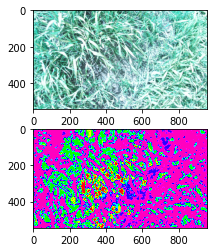

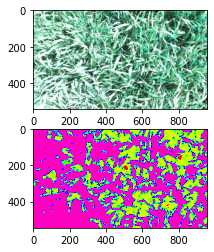

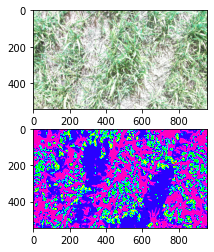

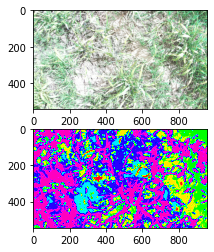

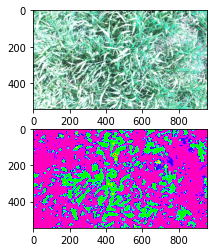

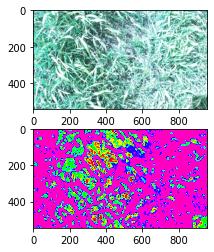

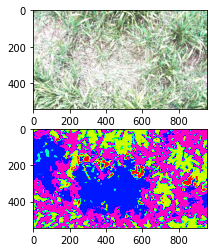

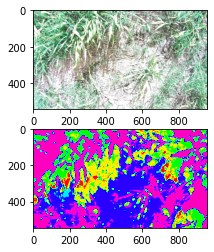

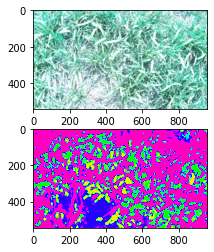

In [347]:
f_imgs=[]
imgs=[]
n_img=0
fs=os.listdir(p)
shuffle(fs)
for f in fs:
    if 'bgr' in f:
        f_imgs = np.append(f_imgs,f)
        bgr = cv2.imread(os.path.join(p,f),cv2.IMREAD_UNCHANGED)
        f_labels = f.split('_nofix_bgr')[0]+'_sun.tif'
        labels1 = cv2.imread(os.path.join(p,f_labels),cv2.IMREAD_UNCHANGED)
        f_labels = f.split('_nofix_bgr')[0]+'_src.tif'
        labels2 = cv2.imread(os.path.join(p,f_labels),cv2.IMREAD_UNCHANGED)
        lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
        hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
        img = cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY)
        l,a,bb = cv2.split(lab)
        h,s,v = cv2.split(hsv)
        
        sd_l1 = localSD(l, 127)
        sd_l2 = localSD(l, 63)
        sd_l3 = localSD(l, 31)
        
        lbp_l1 = localBP(l, 32, 4, method='ror')
        lbp_l2 = localBP(l, 24, 3, method='ror')
        lbp_l3 = localBP(l, 16, 2, method='ror')
        
        sd_a1 = localSD(a, 127)
        sd_a2 = localSD(a, 63)
        sd_a3 = localSD(a, 31)
        
        lbp_a1 = localBP(a, 32, 4, method='ror')
        lbp_a2 = localBP(a, 24, 3, method='ror')
        lbp_a3 = localBP(a, 16, 2, method='ror')
        
        sd_b1 = localSD(bb, 127)
        sd_b2 = localSD(bb, 63)
        sd_b3 = localSD(bb, 31)
        
        lbp_b1 = localBP(bb, 32, 4, method='ror')
        lbp_b2 = localBP(bb, 24, 3, method='ror')
        lbp_b3 = localBP(bb, 16, 2, method='ror')
        
        sd_h1 = localSD(h, 127)
        sd_h2 = localSD(h, 63)
        sd_h3 = localSD(h, 31)
        
        lbp_h1 = localBP(h, 32, 4, method='ror')
        lbp_h2 = localBP(h, 24, 3, method='ror')
        lbp_h3 = localBP(h, 16, 2, method='ror')
        
        sd_s1 = localSD(s, 127)
        sd_s2 = localSD(s, 63)
        sd_s3 = localSD(s, 31)
        
        lbp_s1 = localBP(s, 32, 4, method='ror')
        lbp_s2 = localBP(s, 24, 3, method='ror')
        lbp_s3 = localBP(s, 16, 2, method='ror')
        
        sd_v1 = localSD(v, 127)
        sd_v2 = localSD(v, 63)
        sd_v3 = localSD(v, 31)
        
        lbp_v1 = localBP(v, 32, 4, method='ror')
        lbp_v2 = localBP(v, 24, 3, method='ror')
        lbp_v3 = localBP(v, 16, 2, method='ror')
        
        ddepth = cv2.CV_16S
        
        if True:
            plt.subplot(211)
            plt.imshow(bgr)
            plt.subplot(212)
            plt.imshow(3*labels1+labels2,cmap='gist_rainbow')
            plt.show()
        img_size = l.shape
        bb = bb.ravel()
        a = a.ravel()
        l = l.ravel()
        h = h.ravel()
        s = s.ravel()
        v = v.ravel()
        sd_l1 = sd_l1.ravel()
        sd_l2 = sd_l2.ravel()
        sd_l3 = sd_l3.ravel()
        lbp_l1 = lbp_l1.ravel()
        lbp_l2 = lbp_l2.ravel()
        lbp_l3 = lbp_l3.ravel()
        sd_a1 = sd_a1.ravel()
        sd_a2 = sd_a2.ravel()
        sd_a3 = sd_a3.ravel()
        lbp_a1 = lbp_a1.ravel()
        lbp_a2 = lbp_a2.ravel()
        lbp_a3 = lbp_a3.ravel()
        sd_b1 = sd_b1.ravel()
        sd_b2 = sd_b2.ravel()
        sd_b3 = sd_b3.ravel()
        lbp_b1 = lbp_b1.ravel()
        lbp_b2 = lbp_b2.ravel()
        lbp_b3 = lbp_b3.ravel()
        sd_h1 = sd_h1.ravel()
        sd_h2 = sd_h2.ravel()
        sd_h3 = sd_h3.ravel()
        lbp_h1 = lbp_h1.ravel()
        lbp_h2 = lbp_h2.ravel()
        lbp_h3 = lbp_h3.ravel()
        lap_h1 = lap_h1.ravel()
        lap_h2 = lap_h2.ravel()
        lap_h3 = lap_h3.ravel()
        sd_s1 = sd_s1.ravel()
        sd_s2 = sd_s2.ravel()
        sd_s3 = sd_s3.ravel()
        lbp_s1 = lbp_s1.ravel()
        lbp_s2 = lbp_s2.ravel()
        lbp_s3 = lbp_s3.ravel()
        sd_v1 = sd_v1.ravel()
        sd_v2 = sd_v2.ravel()
        sd_v3 = sd_v3.ravel()
        lbp_v1 = lbp_v1.ravel()
        lbp_v2 = lbp_v2.ravel()
        lbp_v3 = lbp_v3.ravel()
        feat = np.vstack((l.T,a.T,bb.T,h.T,s.T,v.T,
                          sd_l1.T,sd_l2.T,sd_l3.T,
                          lbp_l1.T,lbp_l2.T,lbp_l3.T,
                          sd_a1.T,sd_a2.T,sd_a3.T,
                          lbp_a1.T,lbp_a2.T,lbp_a3.T,
                          sd_b1.T,sd_b2.T,sd_b3.T,
                          lbp_b1.T,lbp_b2.T,lbp_b3.T,
                          sd_h1.T,sd_h2.T,sd_h3.T,
                          lbp_h1.T,lbp_h2.T,lbp_h3.T,
                          sd_s1.T,sd_s2.T,sd_s3.T,
                          lbp_s1.T,lbp_s2.T,lbp_s3.T,
                          sd_v1.T,sd_v2.T,sd_v3.T,
                          lbp_v1.T,lbp_v2.T,lbp_v3.T)).T
        #labels = np.sum(np.vstack((soil.ravel().T, residue.ravel().T*2, shadow.ravel().T*3, vegetation.ravel().T*4)).T,axis=1)
        labels1 = labels1.ravel()        
        labels2 = labels2.ravel() 
        #6-class
        labels3 = 3*labels1+labels2   
        
        imgs.append({'bgr':bgr,'feats':feat,'labels1':labels1,'labels2':labels2,'labels3':labels3})
        n_img=n_img+1
n_feat = feat.shape[1]

In [348]:
n_feat

60

In [349]:
feats = []
labels1 = []
labels2 = []
labels3 = []
for sample in imgs:
    feats.append(sample['feats'])
    labels1.append(sample['labels1'])
    labels2.append(sample['labels2'])
    labels3.append(sample['labels3'])

In [350]:
feats = np.array(feats).reshape((-1,n_feat)).astype(np.float32)
labels1 = np.array(labels1).reshape((-1,1)).astype(np.int32).ravel()
labels2 = np.array(labels2).reshape((-1,1)).astype(np.int32).ravel()
labels3 = np.array(labels3).reshape((-1,1)).astype(np.int32).ravel()
scaler = StandardScaler()
feats = scaler.fit_transform(feats)

In [351]:
train_feats1, test_feats1, train_labels1, test_labels1 = train_test_split(feats, labels1, test_size=0.2, random_state=42)
train_feats2, test_feats2, train_labels2, test_labels2 = train_test_split(feats, labels2, test_size=0.2, random_state=42)
train_feats3, test_feats3, train_labels3, test_labels3 = train_test_split(feats, labels3, test_size=0.2, random_state=42)

In [352]:
def cornfusion(obs,pred,nclass):
    M = np.zeros((nclass,nclass))
    for i in range(obs.shape[0]):
        o = obs[i]
        p = pred[i]
        M[o,p] = M[o,p]+1
    return M

In [353]:
train_feats = train_feats1#[:,mask1]
test_feats = test_feats1#[:,mask1]

In [354]:
parameters = {'activation':('relu','logistic'),'hidden_layer_sizes':((int(n_feat/4), n_components1*2),
                                                                     (int(n_feat/2), n_components1*2),
                                                                     (n_feat, n_components1*2),
                                                                     (n_feat*2, n_components1*2),
                                                                     (n_feat*4, n_components1*2),
                                                                     (int(n_feat/4), n_components1),
                                                                     (int(n_feat/2), n_components1),
                                                                     (n_feat, n_components1),
                                                                     (n_feat*2, n_components1),
                                                                     (n_feat*4, n_components1))}
mlp = MLPClassifier(max_iter=100000,random_state=42)

clf_mlp1 = GridSearchCV(mlp, parameters,n_jobs=-1,cv=5,verbose=3)
clf_mlp1.fit(train_feats, train_labels1)

clf_mlp1.best_params_

model_mlp1 = clf_mlp1.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 4/5] END activation=relu, hidden_layer_sizes=(240, 4);, score=0.944 total time=82.8min
[CV 1/5] END activation=relu, hidden_layer_sizes=(30, 2);, score=0.931 total time=19.8min
[CV 3/5] END activation=relu, hidden_layer_sizes=(240, 2);, score=0.942 total time=64.5min
[CV 4/5] END activation=relu, hidden_layer_sizes=(120, 4);, score=0.938 total time=36.9min
[CV 5/5] END activation=logistic, hidden_layer_sizes=(60, 4);, score=0.936 total time=48.8min
[CV 2/5] END activation=relu, hidden_layer_sizes=(60, 4);, score=0.936 total time=27.8min
[CV 3/5] END activation=logistic, hidden_layer_sizes=(15, 4);, score=0.928 total time=12.9min
[CV 3/5] END activation=logistic, hidden_layer_sizes=(120, 4);, score=0.941 total time=48.3min
[CV 5/5] END activation=relu, hidden_layer_sizes=(15, 4);, score=0.927 total time= 9.2min
[CV 2/5] END activation=relu, hidden_layer_sizes=(60, 2);, score=0.935 total time=26.0min
[CV 3/5] END activatio

In [355]:
pred_mlp1 = clf_mlp1.predict(test_feats)

In [356]:
import pickle
filename = 'finalized_model1.pk.sav'
pickle.dump(model_mlp1, open(filename, 'wb'))

In [357]:
M_mlp1 = cornfusion(test_labels1,pred_mlp1,n_components1)
M_mlp1 = M_mlp1/np.sum(np.sum(M_mlp1))
recall1 = np.diag(M_mlp1)/np.sum(M_mlp1,axis=1)
precis1 = np.diag(M_mlp1)/np.sum(M_mlp1,axis=0)
M_mlp1

array([[0.24651608, 0.02626506],
       [0.02952878, 0.69769008]])

In [358]:
train_feats = train_feats2#[:,mask2]
test_feats = test_feats2#[:,mask2]

In [359]:
parameters = {'activation':('relu','logistic'),'hidden_layer_sizes':((int(n_feat/4), n_components2*2),
                                                                     (int(n_feat/2), n_components2*2),
                                                                     (n_feat, n_components2*2),
                                                                     (n_feat*2, n_components2*2),
                                                                     (n_feat*4, n_components2*2),
                                                                     (int(n_feat/4), n_components2),
                                                                     (int(n_feat/2), n_components2),
                                                                     (n_feat, n_components2),
                                                                     (n_feat*2, n_components2),
                                                                     (n_feat*4, n_components2))}
mlp = MLPClassifier(max_iter=100000,random_state=42)

clf_mlp2 = GridSearchCV(mlp, parameters,n_jobs=-1,cv=5,verbose=3)
clf_mlp2.fit(train_feats, train_labels2)

model_mlp2 = clf_mlp2.best_estimator_
pred_mlp2 = clf_mlp2.predict(test_feats)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 5/5] END activation=relu, hidden_layer_sizes=(240, 6);, score=0.945 total time=62.4min
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30, 3);, score=0.928 total time=27.3min
[CV 5/5] END activation=relu, hidden_layer_sizes=(60, 6);, score=0.934 total time=26.8min
[CV 5/5] END activation=relu, hidden_layer_sizes=(240, 3);, score=0.941 total time=63.1min
[CV 1/5] END activation=relu, hidden_layer_sizes=(120, 6);, score=0.940 total time=38.0min
[CV 5/5] END activation=logistic, hidden_layer_sizes=(30, 6);, score=0.927 total time=25.5min
[CV 3/5] END activation=logistic, hidden_layer_sizes=(30, 3);, score=0.926 total time=26.6min
[CV 2/5] END activation=relu, hidden_layer_sizes=(30, 3);, score=0.926 total time=16.5min
[CV 5/5] END activation=relu, hidden_layer_sizes=(60, 3);, score=0.931 total time=29.4min
[CV 5/5] END activation=logistic, hidden_layer_sizes=(60, 6);, score=0.936 total time=46.9min
[CV 3/5] END activa

In [360]:
M_mlp2 = cornfusion(test_labels2,pred_mlp2,n_components2)
M_mlp2 = M_mlp2/np.sum(np.sum(M_mlp2))
recall2 = np.diag(M_mlp2)/np.sum(M_mlp2,axis=1)
precis2 = np.diag(M_mlp2)/np.sum(M_mlp2,axis=0)
M_mlp2

array([[0.01729409, 0.00626255, 0.00317968],
       [0.00270416, 0.17965984, 0.02526191],
       [0.00170207, 0.01386229, 0.7500734 ]])

In [361]:
precis2

array([0.79695083, 0.89926732, 0.96346688])

In [362]:
filename = 'finalized_model2.pk.sav'
pickle.dump(model_mlp2, open(filename, 'wb'))

In [363]:
train_feats = train_feats3#[:,mask3]
test_feats = test_feats3#[:,mask3]

In [364]:
parameters = {'activation':('relu','logistic'),'hidden_layer_sizes':((int(n_feat/4), n_components3*2),
                                                                     (int(n_feat/2), n_components3*2),
                                                                     (n_feat, n_components3*2),
                                                                     (n_feat*2, n_components3*2),
                                                                     (n_feat*4, n_components3*2),
                                                                     (int(n_feat/4), n_components3),
                                                                     (int(n_feat/2), n_components3),
                                                                     (n_feat, n_components3),
                                                                     (n_feat*2, n_components3),
                                                                     (n_feat*4, n_components3))}#svc = SGDClassifier(max_iter=100000)
mlp = MLPClassifier(max_iter=100000,random_state=42)
clf_mlp3 = GridSearchCV(mlp, parameters,n_jobs=-1,cv=5,verbose=3)
clf_mlp3.fit(train_feats, train_labels3)

model_mlp3 = clf_mlp3.best_estimator_
pred_mlp3 = clf_mlp3.predict(test_feats)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 2/5] END activation=relu, hidden_layer_sizes=(60, 12);, score=0.872 total time=53.6min
[CV 4/5] END activation=logistic, hidden_layer_sizes=(30, 12);, score=0.862 total time=43.6min
[CV 1/5] END activation=logistic, hidden_layer_sizes=(30, 6);, score=0.858 total time=27.0min
[CV 5/5] END activation=relu, hidden_layer_sizes=(30, 12);, score=0.861 total time=40.7min
[CV 1/5] END activation=logistic, hidden_layer_sizes=(15, 12);, score=0.849 total time=21.5min
[CV 1/5] END activation=logistic, hidden_layer_sizes=(120, 12);, score=0.881 total time=65.5min
[CV 3/5] END activation=relu, hidden_layer_sizes=(15, 6);, score=0.846 total time=12.8min
[CV 4/5] END activation=relu, hidden_layer_sizes=(30, 6);, score=0.853 total time=27.5min
[CV 5/5] END activation=relu, hidden_layer_sizes=(240, 6);, score=0.884 total time=90.7min
[CV 1/5] END activation=relu, hidden_layer_sizes=(15, 12);, score=0.852 total time=32.0min
[CV 5/5] END a

In [365]:
M_mlp3 = cornfusion(test_labels3,pred_mlp3,n_components3)
M_mlp3 = M_mlp3/np.sum(np.sum(M_mlp3))
recall3 = np.diag(M_mlp3)/np.sum(M_mlp3,axis=1)
precis3 = np.diag(M_mlp3)/np.sum(M_mlp3,axis=0)
M_mlp3

array([[7.84973278e-03, 2.31162343e-03, 1.57122311e-03, 3.01053581e-04,
        4.64877791e-04, 9.57414216e-05],
       [1.06379357e-03, 4.28038620e-02, 5.94766987e-03, 3.08500136e-05,
        5.55832142e-03, 8.80821078e-04],
       [9.14862473e-04, 4.18815530e-03, 1.72040952e-01, 1.48931100e-05,
        6.85083061e-04, 2.60576236e-02],
       [2.10631127e-04, 1.81908701e-04, 4.25517429e-05, 7.52740332e-03,
        4.67750034e-03, 1.50207653e-03],
       [4.89345044e-05, 3.61264297e-03, 6.73381332e-04, 5.21258851e-04,
        1.32216776e-01, 1.42675994e-02],
       [7.12741694e-05, 5.22322644e-04, 1.79632183e-02, 4.90408837e-04,
        1.24314917e-02, 5.30257481e-01]])

In [366]:
M_mlp4 = cornfusion(test_labels3,3*pred_mlp1+pred_mlp2,n_components3)
M_mlp4 = M_mlp4/np.sum(np.sum(M_mlp4))
recall4 = np.diag(M_mlp4)/np.sum(M_mlp4,axis=1)
precis4 = np.diag(M_mlp4)/np.sum(M_mlp4,axis=0)
M_mlp4

f3=(recall3*precis3/(recall3+precis3)*2)
f4=(recall4*precis4/(recall4+precis4)*2)

print(f3)

print(f4)

[0.68998083 0.77891884 0.85562595 0.65376265 0.86029722 0.93454112]
[0.70433229 0.77447003 0.86187117 0.6705557  0.86283272 0.93524   ]


In [367]:
filename = 'finalized_model3.pk.sav'
pickle.dump(model_mlp3, open(filename, 'wb'))

In [368]:
M_mlp1_df = {}
M_mlp1_df['shade'] = M_mlp1[:,0]
M_mlp1_df['sun'] = M_mlp1[:,1]
M_mlp1_df = DataFrame(M_mlp1_df)
M_mlp1_df.to_csv(os.path.join(p2,'M1.csv'))

M_mlp2_df = {}
M_mlp2_df['soil'] = M_mlp2[:,0]
M_mlp2_df['res'] = M_mlp2[:,1]
M_mlp2_df['can'] = M_mlp2[:,2]
M_mlp2_df = DataFrame(M_mlp2_df)
M_mlp2_df.to_csv(os.path.join(p2,'M2.csv'))

M_mlp3_df = {}
M_mlp3_df['shade_soil'] = M_mlp3[:,0]
M_mlp3_df['shade_res'] = M_mlp3[:,1]
M_mlp3_df['shade_can'] = M_mlp3[:,2]
M_mlp3_df['sun_soil'] = M_mlp3[:,3]
M_mlp3_df['sun_res'] = M_mlp3[:,4]
M_mlp3_df['sun_can'] = M_mlp3[:,5]
M_mlp3_df = DataFrame(M_mlp3_df)
M_mlp3_df.to_csv(os.path.join(p2,'M3.csv'))

M_mlp4_df = {}
M_mlp4_df['shade_soil'] = M_mlp4[:,0]
M_mlp4_df['shade_res'] = M_mlp4[:,1]
M_mlp4_df['shade_can'] = M_mlp4[:,2]
M_mlp4_df['sun_soil'] = M_mlp4[:,3]
M_mlp4_df['sun_res'] = M_mlp4[:,4]
M_mlp4_df['sun_can'] = M_mlp4[:,5]
M_mlp4_df = DataFrame(M_mlp4_df)
M_mlp4_df.to_csv(os.path.join(p2,'M4.csv'))

p1_df = DataFrame(clf_mlp1.best_params_)
p1_df.to_csv(os.path.join(p2,'params1.csv'))

p2_df = DataFrame(clf_mlp2.best_params_)
p2_df.to_csv(os.path.join(p2,'params2.csv'))

p3_df = DataFrame(clf_mlp3.best_params_)
p3_df.to_csv(os.path.join(p2,'params3.csv'))